<a href="https://colab.research.google.com/github/vladiant/SoftUniMachineLearning2019/blob/master/2_Linear_And_Logistic_Regression/LinearLogisticClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
# from sklearn import datasets
# iris_data = datasets.load_iris()
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.columns = ["petal_width", "petal_height", "sepal_width", "sepal_height", "class"]
iris_data.shape


(150, 5)

In [ ]:
iris_data.groupby("class").size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

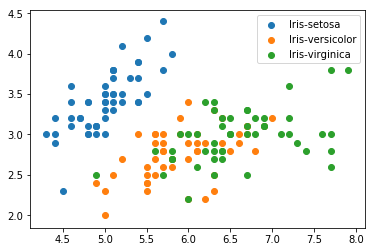

In [ ]:
# plt.scatter(iris_data.petal_width, iris_data.petal_height)
for class_name, data in iris_data.groupby("class"):
#      print(class_name)
     plt.scatter(data.petal_width, data.petal_height, label=class_name)
plt.legend()
plt.show()

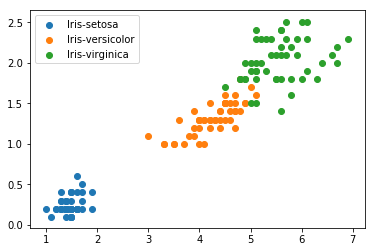

In [ ]:
for class_name, data in iris_data.groupby("class"):
     plt.scatter(data.sepal_width, data.sepal_height, label=class_name)
plt.legend()
plt.show()

In [ ]:
iris_model = LogisticRegression(C = 1e9)

In [ ]:
iris_data_input = iris_data.drop("class", axis=1)
iris_data_output = iris_data["class"]
# iris_data_input.shape
# iris_data_output.shape

(150, 4)

In [ ]:
iris_model.fit(iris_data_input, iris_data_output)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
iris_model.score(iris_data_input, iris_data_output)

0.98

In [ ]:
iris_model.predict(iris_data_input[:10])

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
# indices = iris_data.sample(10).index
tesing_sample = iris_data.sample(10)
tesing_sample_input = tesing_sample.drop("class", axis=1)
tesing_sample_output = tesing_sample["class"]

In [ ]:
iris_model.predict(tesing_sample_input)

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
tesing_sample_output

31         Iris-setosa
116     Iris-virginica
113     Iris-virginica
17         Iris-setosa
120     Iris-virginica
63     Iris-versicolor
4          Iris-setosa
24         Iris-setosa
85     Iris-versicolor
111     Iris-virginica
Name: class, dtype: object

In [ ]:
iris_model.coef_

array([[ 1.51526143,  4.92414809, -7.80941588, -3.81889452],
       [-0.25239142, -2.77909536,  1.29890497, -2.70358801],
       [-2.46312217, -6.66511925,  9.40005297, 18.2370386 ]])

In [ ]:
iris_model.intercept_

array([  0.90113811,   7.32072393, -42.46850592])